<h1><center>Introduction to Functional Brain Parcellation</center></h1>
<center><img src="yeo_krienen_7.png" width=750 height=300
    style="padding:0; border:0; display: block;
    margin-left: auto; margin-right: auto"></center>
<center>Pierre Bellec</center>

<center>
    <div id="banner" style="overflow: hidden; justify-content:space-around;">
        <div class="" style="max-width: 20%;max-height: 20%;display: inline-block;">
            <img src="logo_udem.png" width="200px" alt="">
        </div>
        <div class="" style="max-width: 20%;max-height: 20%;display: inline-block;">
            <img src="logo_criugm.png" width="200px" alt="">
        </div>
        <div class="" style="max-width: 20%;max-height: 20%;display: inline-block;">
            <img src="logo_unf.png" width="200px" alt="">
        </div>
    </div>
</center>

<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img style="padding: 30px 30px 30px 30px;" src="varela2001.png" width="100%" alt="">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <h1><center>Why parcellations? understand brain organization</center></h1>
        <par>
            Local and distributed connectivity lead to the emergence of both local and distributed neuronal assemblies, also called functional networks. Figures from <a href="https://doi.org/10.1038/35067550">Varela et al., 2001</a>.
        </par>
    </div>
</div>


<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img class=style="padding: 30px 30px 30px 30px;" src="graphs_adhd200.png" width="75%" alt="">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <h1><center>Why parcellations? reduce dimensionality</center></h1>
        <par>
            Parcels can be used as nodes to approximate brain networks as graphs. Here, the average connectome of the ADHD-200 sample is represented with several different parcellations, of varying resolutions. From <a href="https://doi.org/10.1016/j.neuroimage.2016.06.034">Bellec et al., Neuroimage (2017)</a>.
        </par>
    </div>
</div>

# Code and data

Nilearn code is presented to generate figures similar to most slides in this presentation. To run the code locally, clone the [github repository](https://github.com/pbellec/functional_parcellation) and install the dependencies listed in [`requirements.txt`](https://github.com/pbellec/functional_parcellation/blob/master/requirements.txt) and run the following code to cache all the necessary data:

In [1]:
import warnings
warnings.filterwarnings("ignore")

from nilearn import datasets # Fetch data using nilearn
basc = datasets.fetch_atlas_basc_multiscale_2015() # the BASC multiscale atlas
adhd = datasets.fetch_adhd(n_subjects=10)          # ADHD200 preprocessed data (Athena pipeline)
atlas_yeo = datasets.fetch_atlas_yeo_2011()        # the Yeo-Krienen atlas

<h1><center>The BOLD signal</center></h1>

<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img style="padding: 30px 30px 30px 30px;" src="neurovascular.png" width="100%">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <par>
            Vasculature meshes with neuronal population at a very fine spatial scale, (~10 microns), with micro-capilaries regulating blood oxygenation in a highly local and precise way. The Blood Oxygenation-Level Dependent (BOLD) signal in fMRI captures this neurovasculare coupling. Figure adapted from Harrison, 2002 and Dr Bruce Pike. Check this <a href"https://youtu.be/RoKt_c08wxQ?t=111"> lecture</a> for more info.
        </par>
    </div>
</div>


<h1><center>functional Magnetic Resonance Imaging</center></h1>
<par>
fMRI is a 4D imaging modality. Each brain parcel, down to a single volume element (voxel), is associated with a time series.
</par>
<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img style="padding: 30px 30px 30px 30px;"  src="fmri_vol.jpg" width="100%">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <img style="padding: 30px 30px 30px 30px;"  src="fmri_time_series.png" width="70%">
    </div>
</div>


# Brain parcels

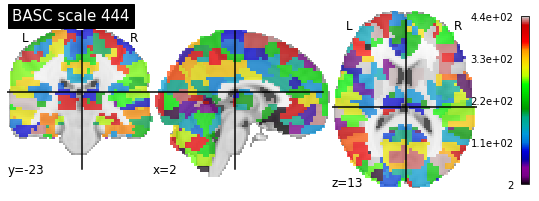

In [2]:
# Let's load some small brain parcels!
from nilearn import plotting, input_data
plotting.plot_roi(basc["scale444"], title="BASC scale 444", colorbar=True, cmap="nipy_spectral")

# Parcel time series extraction

In [3]:
# We use a nilearn masker to load time series from the parcellation above
masker = input_data.NiftiLabelsMasker(basc['scale444'], resampling_target="data", detrend=True, 
        standardize=True, smoothing_fwhm=5, memory='nilearn_cache', memory_level=1).fit()
tseries = masker.transform(adhd.func[0])
print(f"Time series with shape {tseries.shape} (# time points, # parcels))")

Time series with shape (176, 444) (# time points, # parcels))


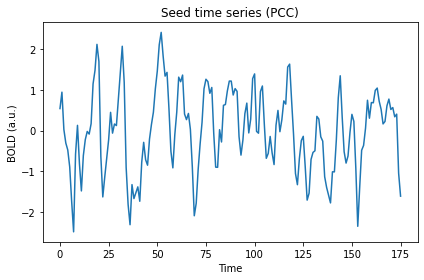

In [4]:
# plot time series for one region 
import matplotlib.pyplot as plt
plt.plot(tseries[:,316]), plt.title('Seed time series (PCC)'), plt.xlabel('Time'), plt.ylabel('BOLD (a.u.)')
plt.tight_layout()

<h1><center>Seed-based connectivity map</center></h1>
<par>
Slow spontaneous fluctuations and seed-based connectivity map from the posterior cingulate cortex identifies the default-mode network. See the following <a href=https://nilearn.github.io/auto_examples/03_connectivity/plot_seed_to_voxel_correlation.html> nilearn tutorial</a> for more details.
</par>
<center>
<img style="padding: 30px 30px 30px 30px;"  src="fig_fcmri.png" width="65%">
</center>

# Loading voxel data 

In [5]:
# Load voxel-level data - a brain mask is automatically computed
masker_voxel = input_data.NiftiMasker(detrend=True, standardize=True, smoothing_fwhm=5).fit(adhd.func[0])
tseries_voxel = masker_voxel.transform(adhd.func[0])

print(f"Time series with shape {tseries_voxel.shape} (# time points, # voxels))")

Time series with shape (176, 69681) (# time points, # voxels))


# Computing the voxel-based connectivity map

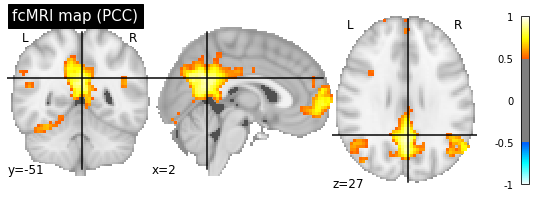

In [6]:
# Compute correlation, and look at voxel-based connectivity map
import numpy as np
seed_to_voxel_correlations = (np.dot(tseries_voxel.T, tseries[:, 316]) / tseries.shape[0])# Show the connectivity map
conn_map = masker_voxel.inverse_transform(seed_to_voxel_correlations.T)
plotting.plot_stat_map(conn_map, cut_coords=(2, -51, 27), threshold=0.5, vmax=1, title="fcMRI map (PCC)")

<h1><center>Functional Connectome</center></h1>
<par>
A functional connectome essentially is a collection of seed-based connectivity maps, approximated (or compressed) on parcels, and using all possible seeds. 
</par>
<center>
<img style="padding: 30px 30px 30px 30px;" src="connectome.png" width="90%">
</center>

<h1><center>Functional Connectome</center></h1>

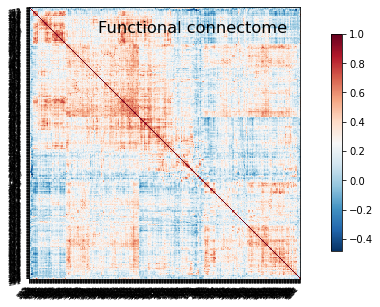

In [7]:
# We generate a connectome 
from nilearn.connectome import ConnectivityMeasure
conn = np.squeeze(ConnectivityMeasure(kind='correlation').fit_transform([tseries]))

# Plot the connectome, with no particular region order
plotting.plot_matrix(conn, labels = range(444), title='Functional connectome', reorder='average')

# Compressed connectivity map
[(Craddock et al., 2012)](https://doi.org/10.1002/hbm.21333) proposed to evaluate parcellation through compression.

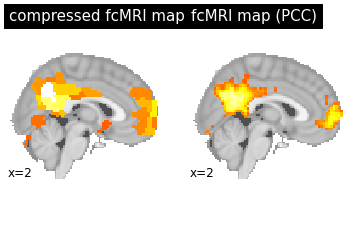

In [8]:
# Let's project back one of the column of the connectome in voxel space, and show the original voxel-based map for comparison
conn_map_compressed = masker.inverse_transform(conn[316, :].reshape([1, 444]))
plotting.plot_stat_map(conn_map_compressed, display_mode='x', cut_coords=(2, ), axes=plt.subplot(1, 2, 1), threshold=0.5, vmax=1, title="compressed fcMRI map (PCC)", colorbar=False)
plotting.plot_stat_map(conn_map, display_mode='x', cut_coords=(2, ), axes=plt.subplot(1, 2, 2), threshold=0.5, vmax=1, title="fcMRI map (PCC)", colorbar=False)

<h1><center>Functional Networks</center></h1>
<par>
With the rigth order on parcels, we can see functional networks as diagonal squares with high connectivity on the diagonal. Finding these squares (and the order) can be solved with a cluster analysis.
</par>
<center>
<img style="padding: 30px 30px 30px 30px;" src="networks.png" width="90%">
</center>

# Hierarchical cluster analysis: growing a tree 

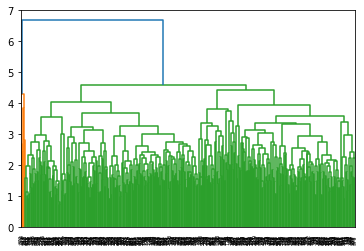

In [9]:
# we use scipy's hierarchical clustering implementation
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
# That's the hierarchical clustering step
hier = linkage(conn, method='average', metric='euclidean') # scipy's hierarchical clustering
# HAC proceeds by iteratively merging brain regions, which can be visualized with a tree
res = dendrogram(hier, get_leaves=True) # Generate a dendrogram from the hierarchy

# Hierarchical cluster analysis: ordering leaves

In [10]:
# the order of merging above give us a good order to visualize the matrix
order = res.get('leaves') # Extract the order on parcels from the dendrogram
print(order[0:10])
# here parcel 372 is the left-most leaf in the tree, then 385, etc

[372, 385, 4, 53, 197, 287, 313, 346, 62, 192]


# Hierarchical cluster analysis: cutting a tree

In [11]:
# We can cut the tree at whatever number of clusters we choose (here 17, because 17 is good)
part = np.squeeze(cut_tree(hier, n_clusters=17)) # Cut the hierarchy
# Each entry of the vector part is a parcel, and codes for the number of the network of this parcel
print(part[0:15]) # e.g. parcel #7 is in cluster 5. What is the cluster of parcel number 10?

[ 0  1  2  3  4  5  5  6  7  8  8  5  9  0 10]


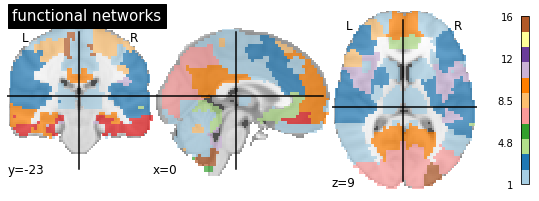

In [12]:
# let's visualize these clusters back in voxel space 
part_img = masker.inverse_transform(part.reshape([1, 444]) + 1) # note the sneaky shift to 1-indexing
plotting.plot_roi(part_img, title="functional networks", colorbar=True, cmap="Paired")

# Hierarchical cluster analysis: order and adjacency

In [13]:
# Another way to represent the clusters is an adjacency matrix A
# A(i,j) = 1 if i and j are in the same cluster, and 0 otherwise
def part2adj(part):
    part = np.reshape(part, [part.shape[0], 1])
    adj = np.repeat(part, part.shape[0], 1) == np.repeat(part.transpose(), part.shape[0], 0)
    return adj.astype(int)

(<AxesSubplot:title={'center':'part'}>,
 Text(0.5, 1.0, 'part'))

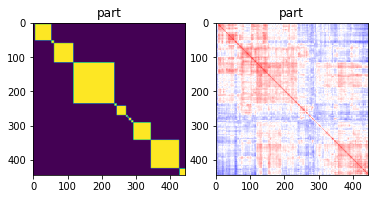

In [14]:
# Let's look at the adjacency matrix
# alongside the connectivity matrix, after reordering
plt.subplot(1,2,1), plt.imshow(part2adj(part[order])), plt.title('part')
plt.subplot(1,2,2), plt.imshow(conn[order, :][:, order], cmap='bwr'), plt.title('part')
# in the adjacency matrix, the clusters are literally squares on the diagonal!

# Hierarchical cluster analysis: compression

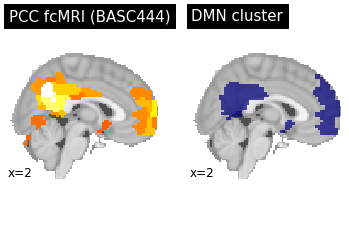

In [15]:
# Let's finally visualize the compressed seed-based PCC map
conn_map_compressed = masker.inverse_transform(conn[316, :].reshape([1, 444]))
plotting.plot_stat_map(conn_map_compressed, display_mode='x', cut_coords=(2, ), threshold=0.5, vmax=1, 
                       axes=plt.subplot(1, 2, 1), title="PCC fcMRI (BASC444)", colorbar=False)

# along with the DMN cluster 
part_img = masker.inverse_transform(part.reshape([1, 444]) + 1 == 10) # note the sneaky shift to 1-indexing
plotting.plot_roi(part_img, title="DMN cluster", display_mode='x', cut_coords=(2, ), axes=plt.subplot(1, 2, 2))

<h1><center>From individual to group parcels</center></h1>
<center>
<img style="padding: 30px 30px 30px 30px;" src="liu2014.png" width="90%">
</center>
Adapted from <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4214158/">Liu et al., Neuroimage (2014)</a>.

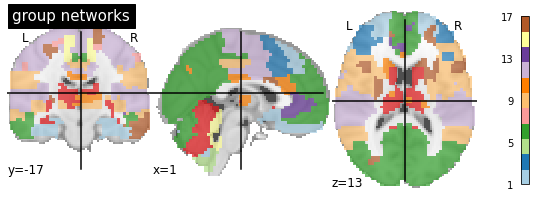

In [16]:
# Let's do a crude group analysis: load time series for a few subjects (N=10)
tseries_all = []
for indx, img in enumerate(adhd.func): 
    tseries_all.append(masker.transform(img))
    
# clustering on the average connectome
conn_all = ConnectivityMeasure(kind='correlation').fit(tseries_all)
hier = linkage(conn_all.mean_, method='average', metric='euclidean') 

# Cut the hierarchy and look at the group-level networks
part_group = np.squeeze(cut_tree(hier, n_clusters=17)) 
part_group_img = masker.inverse_transform(part_group.reshape([1, 444]) + 1) # sneaky shift to 1-indexing
plotting.plot_roi(part_group_img, title="group networks", colorbar=True, cmap="Paired")

<h1><center>Multiresolution parcellations</center></h1>
<par>
<center>
<img style="padding: 30px 30px 30px 30px;" src="fig_multiscale.png" width="80%">
</center>

<h1><center>Golland parcellation (2 clusters)</center></h1>
<par>
Networks can also be merged into reliable “exogeneous” vs “endogeneous” systems. From <a href="https://doi.org/10.1016/j.neuropsychologia.2007.10.003">Golland et al. (2008)</a>. </par>
<center>
<img style="padding: 30px 30px 30px 30px;" src="golland2008.png" width="60%">
</center>

# Yeo-Krienen parcellation (7 clusters)
Group cluster analysis of fMRI connectivity (N=1000) using von Mises-Fisher distribution <a href="https://dx.doi.org/10.1016%2Fj.neuroimage.2009.12.106">(Lashkari et al., 2010)</a>. See <a href="https://dx.doi.org/10.1152%2Fjn.00338.2011">Yeo, Krienen et al. (2011)</a> and this [tutorial](http://nilearn.github.io/auto_examples/04_manipulating_images/plot_extract_regions_labels_image.html#sphx-glr-auto-examples-04-manipulating-images-plot-extract-regions-labels-image-py). Also check as an <a href="Yeo-Krienen atlas scale 7.html">interactive view</a>.

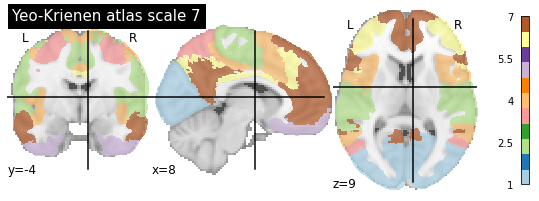

In [17]:
# Let's plot the Yeo-Krienen 7 clusters parcellation
from nilearn import plotting
plotting.plot_roi(atlas_yeo.thick_7, title='Yeo-Krienen atlas scale 7',
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

# Yeo-Krienen parcellation (17 clusters)
Networks can be further divided into subnetworks, e.g. in the visual cortex. From <a href="https://dx.doi.org/10.1152%2Fjn.00338.2011">Yeo, Krienen et al. (2011)</a>. Also check as an <a href="Yeo-Krienen atlas scale 17.html">interactive view</a>.

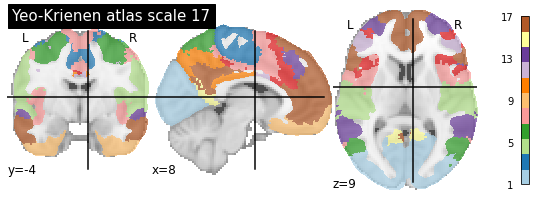

In [18]:
# Let's plot the Yeo-Krienen 7 clusters parcellation
from nilearn import plotting
plotting.plot_roi(atlas_yeo.thick_17, title='Yeo-Krienen atlas scale 17',
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

# Multiresolution parcellations
Some parcellation atlases explicitely offer a range of resolution, such as the MIST atlas below [(Urchs et al., 2019)](https://mniopenresearch.org/articles/1-3) (see [dashboard](https://simexp.github.io/multiscale_dashboard/index.html)) and the Schaefer atlas [(Schaefer et al., 2018)](https://doi.org/10.1093/cercor/bhx179). 

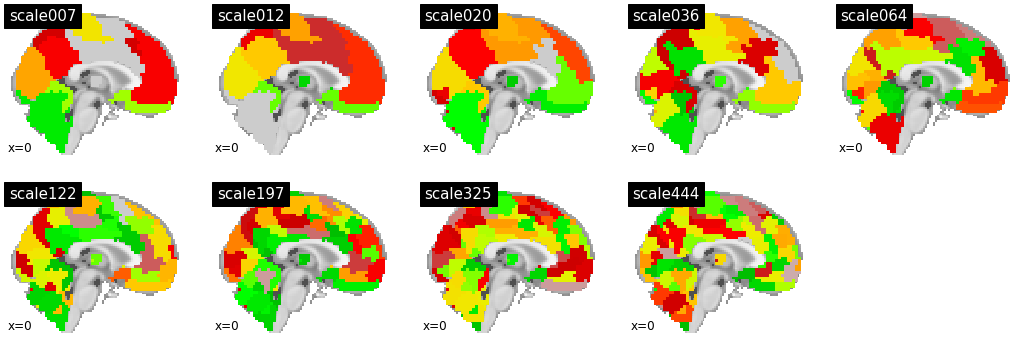

In [19]:
plt.figure(figsize=(18, 6))
for i, scale in enumerate(basc):
    if not scale == 'description':
        plotting.plot_stat_map(basc[scale], display_mode="x", title=scale, cut_coords=(0, ), 
                               colorbar=False, cmap="nipy_spectral", axes=plt.subplot(2, 5, i + 1))

<h1><center>Cluster homogeneity (compression quality)</center></h1>
<par>
Homogeneity of group brain parcels as a function of the average parcel size. Note that homogeneity can closely be predicted from size alone. From Urchs et al. MNI open research (2019).<center>
<img class="img_slide" src="urchs2019.png" width="60%">
</center>

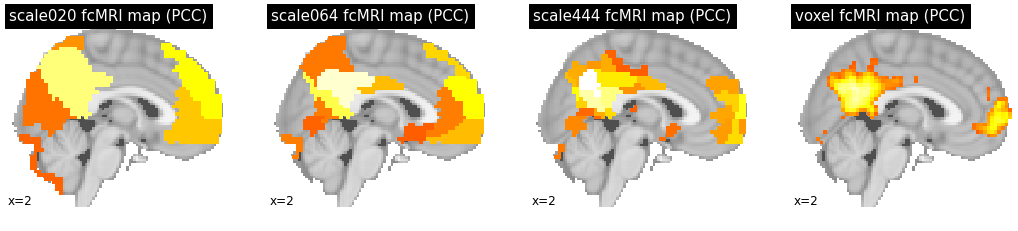

In [20]:
# Let's check qualitatively how compression quality varies with scale.
plt.figure(figsize=(18, 4))
for i, scale in enumerate(("scale020", "scale064", "scale444")):
    masker_scale = input_data.NiftiLabelsMasker(basc[scale], resampling_target="data", detrend=True, 
         standardize=True, smoothing_fwhm=5, memory='nilearn_cache', memory_level=1).fit()
    tseries_scale = masker_scale.transform(adhd.func[0])
    seed_to_voxel_correlations = (np.dot(tseries_scale.T, tseries[:, 316]) / tseries.shape[0])
    conn_map_scale = masker_scale.inverse_transform(seed_to_voxel_correlations.reshape([1, tseries_scale.shape[1]]))
    plotting.plot_stat_map(conn_map_scale, display_mode='x', cut_coords=(2, ), threshold=0.5, vmax=1, 
                       title=f"{scale} fcMRI map (PCC)", axes=plt.subplot(1, 4, i + 1), colorbar=False)
plotting.plot_stat_map(conn_map, display_mode='x', cut_coords=(2, ), threshold=0.5, vmax=1, 
    title="voxel fcMRI map (PCC)", axes=plt.subplot(1, 4, 4), colorbar=False)

<h1><center>Group reproducibility</center></h1>
With large, homogeneous groups, group-level parcellations reproduce closely. Figure adapted from <a href="https://dx.doi.org/10.1152%2Fjn.00338.2011">Yeo, Krienen et al. (2011)</a>.
<center>
<img style="padding: 30px 30px 30px 30px;" src="repro_yeo_krienen.png" width="80%">
</center>

<div class="row content">
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img style="padding: 30px 30px 30px 30px;" src="fig_gordon2017.png" width="70%" alt="">
    </div>
    <div class="col-lg-4 col-md-4 col-xs-4">
        <h1><center>Individual parcels</center></h1>
        <par>
            For ten densely sampled individuals (10 runs of 30 mns resting-state over ten days), <a href="https://doi.org/10.1016/j.neuron.2017.07.011">Gordon et al. (2017)</a> identified details in individual parcellations that cannot be observed at the level of group parcellations (indicated by arrows, group parcellation at the top). 
        </par>
    </div>
</div>

<div class="row content">
    <div class="col-lg-4 col-md-4 col-xs-4">
        <h1>Individual reproducibility</h1>
        Even for long time series, the reproducibility of individual parcellations seems to be reaching a plateau <a href="https://doi.org/10.1016/j.neuron.2017.07.011">(Gordon et al., 2017)</a>.
    </div>
    <div class="col-lg-8 col-md-8 col-xs-8">
        <img style="padding: 30px 30px 30px 30px;" src="repro_gordon2017.png" width="80%" alt="">
    </div>    
</div>

In [21]:
# Let's compare two parcellations generated from different subjects
part_ind = []
for ind in range(2):
    tseries_ind = masker.transform(adhd.func[ind])
    conn_ind = np.squeeze(ConnectivityMeasure(kind='correlation').fit_transform([tseries_ind]))
    hier_ind = linkage(conn_ind, method='average', metric='euclidean') 
    part_ind.append(np.squeeze(cut_tree(hier_ind, n_clusters=17))) 

# If we were to count the proportion of elements in the two adjacency matrices that are identical 
# (excluding the diagonal which is always 1), we would get a measure of agreement called the Rand index. 
# The adjusted Rand score corrects for chance-level overlap, such that the adjusted Rand will be close to 
# zero for cluster overlap near chance level, and adjusted Rand is 1 for identical cluster solutions.
# Note that scikit-learn actually does not need the adjacency matrix representation, but works directly 
# from vectors of cluster labels. 
from sklearn import metrics
repro = metrics.adjusted_rand_score(part_ind[0], part_ind[1])
print("adjusted Rand reproducibility:", repro)

adjusted Rand reproducibility: 0.1058196841391461


Ouch, this is, like, really low. Inter-subject variability? Not enough data? Bad algorithm? all of the above? Check [(Nikolaidis et al., Neuroimage 2020)](https://www.biorxiv.org/content/10.1101/343392v3) for a systematic evaluation.

<h1>Linear decomposition models</center></h1>
<center>
<img style="padding: 30px 30px 30px 30px;" src="khosla2018.png" width="70%">
</center>
Figure from the excellent introduction to multivariate analysis of fMRI by <a href="https://arxiv.org/pdf/1812.11477.pdf">(Khosla et al., ArXiv 2018)</a>

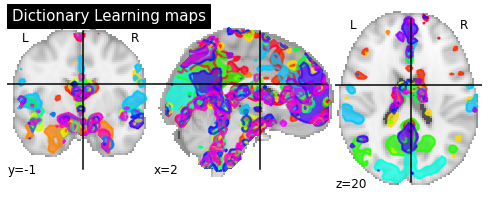

In [22]:
# Let's use dictionary learning from nilearn 
from nilearn.decomposition import DictLearning

# note that the API is quite standard, follows sklearn
# Pretty much all the methods covered so far can be run that easily!
# Note this interface includes the options we previously used for the masker
dict_learn = DictLearning(n_components=17, detrend=True, standardize=False, smoothing_fwhm=5, 
                          memory="nilearn_cache", memory_level=2, random_state=0)
dict_learn.fit(adhd.func[0])

# Let's have a look with the prob atlas viewer
plotting.plot_prob_atlas(dict_learn.components_img_, view_type='filled_contours', title='Dictionary Learning maps')

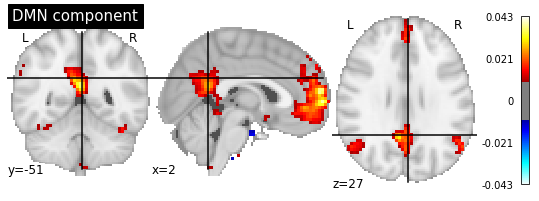

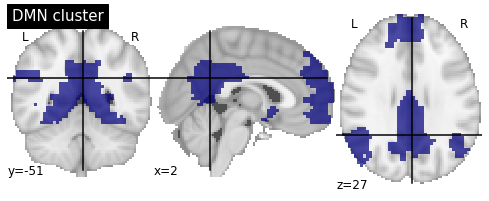

In [23]:
# Now let's compare the DMN cluster with the DMN component
from nilearn import image
plotting.plot_stat_map(image.index_img(dict_learn.components_img_, 13), threshold=0.01, title="DMN component", 
                       cut_coords=(2, -51, 27))
plotting.plot_roi(part_img, title="DMN cluster", cut_coords=(2, -51, 27))
# It does not always work that well!! There are qualitatively different networks that component methods 
# and cluster analysis identify

<h1>Which one is best?</center></h1>
Sparse dictionary learning has a (short) edge in classification benchmarks.
<center>
<img style="padding: 30px 30px 30px 30px;" src="pred_accuracy_multiresolution.png" width="40%">
</center>
Figure from <a href="https://arxiv.org/pdf/2003.05405.pdf">(Dadi et al., ArXiv 2020)</a>

<h1>Which one is best?</center></h1>
Sparse dictionary learning has a (clear) edge in compression quality.
<center>
<img style="padding: 30px 30px 30px 30px;" src="fig_compression.png" width="70%">
</center>
Figure from <a href="https://arxiv.org/pdf/2003.05405.pdf">(Dadi et al., ArXiv 2020)</a>

# Summary

* Functional parcelations are modules of brain regions with higher homogeneity intra-module than inter-modules.
* Parcelations exist over a range of scales, from distributed network down to specialized cortical areas. 
* Homogeneity increases with scale.
* Stability is high at group-level, uneven at individual-level.
* A number of benchmarks are now established to compare parcellation algorithms. 
* There are substantial differences between individual and group parcellations, and these two levels can be estimated jointly. 
* Gradients (or any linear mixture) provide a complementary, richer view on brain organization than parcels, but are also more complex.


<h1>Keep calm and parcellate!</center></h1>
<center>
<img style="padding: 30px 30px 30px 30px;" src="lapolab.webp" width="40%">
</center>
Art by <a href="https://www.emiliogarcia.org/">Emilio Garcia</a>

<h1>Powered by nilearn</center></h1>
<center>
<a href="https://nilearn.github.io"> <img style="padding: 30px 30px 30px 30px;" src="nilearn.png" width="40%"> </a>
</center>